In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
names = [
    't',
    'q1', 'q2', 'q3',
    'dq1', 'dq2', 'dq3',
    'I1', 'I2', 'I3',
    'eps21', 'eps22', 'eps31', 'eps32',
    'ddq1', 'ddq2', 'ddq3'
]
df = pd.read_csv('https://raw.githubusercontent.com/sdrangan/introml/2801f72d7a4fff0633ede56ba701984f9bb05652/mult_lin_reg/exp1.csv', 
                header=None,names=names,index_col=0)

In [4]:
df.head(6)

,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
t,,,,,,,,,,,,,,,,
0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


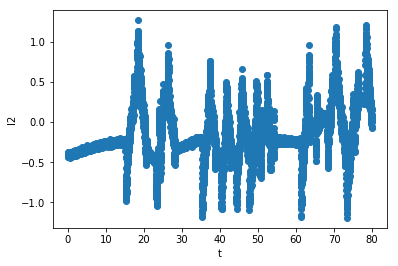

In [5]:
y = df['I2']
t = df.index
plt.plot(t, y, 'o')
plt.xlabel('t')
plt.ylabel('I2')

In [8]:
ytrain = np.array(df[['I2']])
xtrain = np.array(df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32', 'ddq2']])
print(ytrain)

[[-0.40812 ]
 [-0.37241 ]
 [-0.40302 ]
 ..., 
 [ 0.06802 ]
 [ 0.011903]
 [ 0.037411]]


In [9]:
from sklearn import linear_model

#Creat linear regression object
regr = linear_model.LinearRegression()

In [11]:
regr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

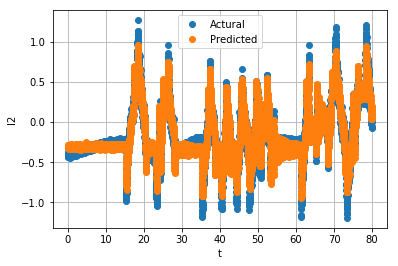

In [12]:
y_tr_pred = regr.predict(xtrain)
plt.plot(t, ytrain, 'o')
plt.plot(t, y_tr_pred, 'o')
plt.grid()
plt.legend(['Actural', 'Predicted'])
plt.xlabel('t')
plt.ylabel('I2')

In [13]:
RSS_train = np.mean((y_tr_pred-ytrain)**2)/(np.std(ytrain)**2)
print("Normalized RSS = {0:f}".format(RSS_train))

Normalized RSS = 0.095833


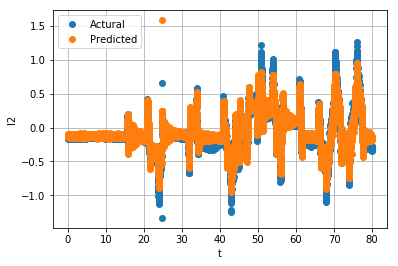

In [14]:
df_test = pd.read_csv('https://raw.githubusercontent.com/sdrangan/introml/2801f72d7a4fff0633ede56ba701984f9bb05652/mult_lin_reg/exp2.csv',
                     header=None, names=names, index_col=0)
y_test = np.array(df_test['I2'])
x_test = np.array(df_test[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32', 'ddq2']])
y_test_pred = regr.predict(x_test)
plt.plot(t, y_test, 'o')
plt.plot(t, y_test_pred, 'o')
plt.grid()
plt.legend(['Actural', 'Predicted'])
plt.xlabel('t')
plt.ylabel('I2')

In [69]:
RSS_test = np.mean((y_test_pred-y_test)**2)/(np.std(y_test)**2)
print("Normalized RSS of test data = {0:f}".format(RSS_test))

Normalized RSS of test data = 0.126780
